In [2]:
import matplotlib
from vector_drawing import *

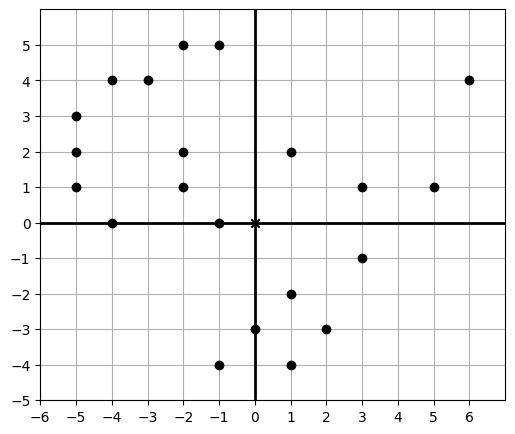

In [3]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]
draw(Points(*dino_vectors))

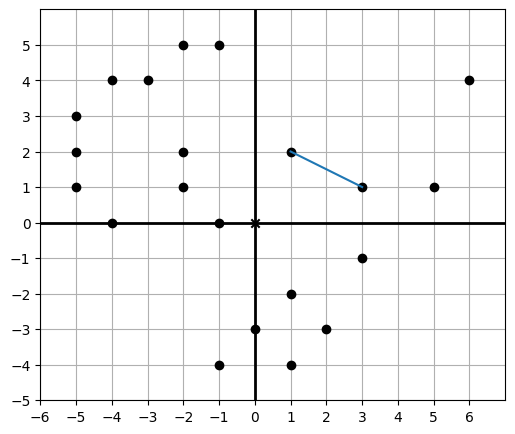

In [7]:
draw(
    Points(*dino_vectors),
    Segment(dino_vectors[1], dino_vectors[2])
    )

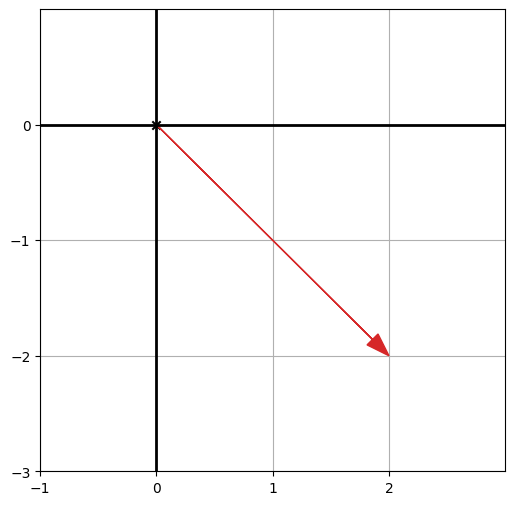

In [ ]:
# 练习2.2: 在平面上画出点(2, -2)和与之对应的箭头。
draw(Arrow((2, -2)))

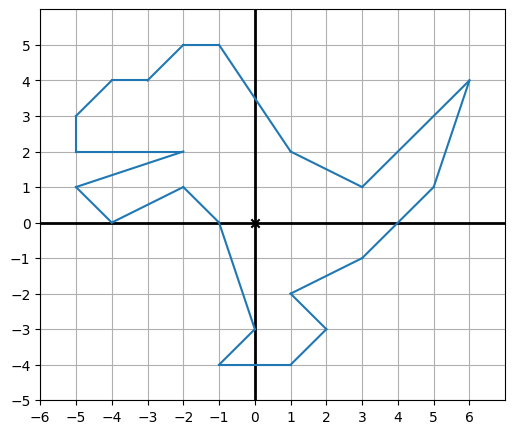

In [10]:
# 练习2.4：构建一个以dino_vectors为顶点的Polygon对象，画出将每个点相连的恐龙图像
draw(Polygon(*dino_vectors))

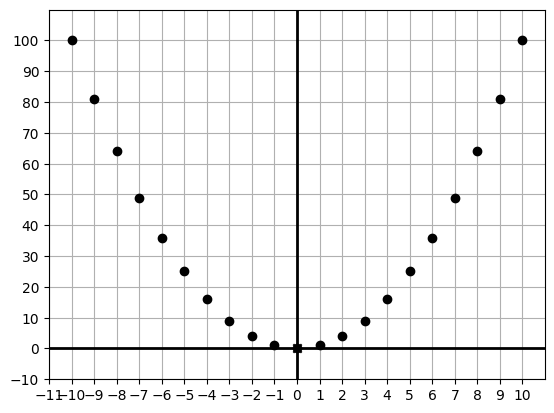

In [ ]:
# 练习2.5：当x坐标在-10到10的范围内时，使用draw函数绘制表示向量(x, x**2)的点
draw(Points(*[(x, x**2) for x in range(-10, 11)])
    ,grid=(1,10)
    ,nice_aspect_ratio=False)

# grid参数为(1, 10)，表示每隔1个单位绘制垂直网格线，以及每隔10个单位绘制水平网格线。nice_aspect_ratio参数设置为False，表示x轴和y轴的比例不必相同。

In [16]:
from vectors import *

In [20]:
dino_vectors2 = [add(x, (-1.5, -2.5)) for x in dino_vectors]
dino_vectors2

[(4.5, 1.5),
 (1.5, -1.5),
 (-0.5, -0.5),
 (-2.5, 2.5),
 (-3.5, 2.5),
 (-4.5, 1.5),
 (-5.5, 1.5),
 (-6.5, 0.5),
 (-6.5, -0.5),
 (-3.5, -0.5),
 (-6.5, -1.5),
 (-5.5, -2.5),
 (-3.5, -1.5),
 (-2.5, -2.5),
 (-1.5, -5.5),
 (-2.5, -6.5),
 (-0.5, -6.5),
 (0.5, -5.5),
 (-0.5, -4.5),
 (1.5, -3.5),
 (3.5, -1.5)]

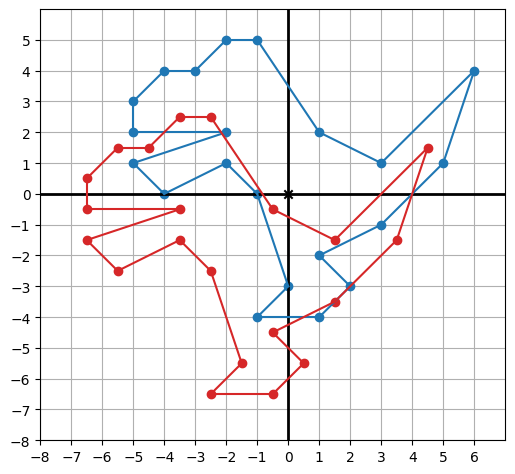

In [19]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

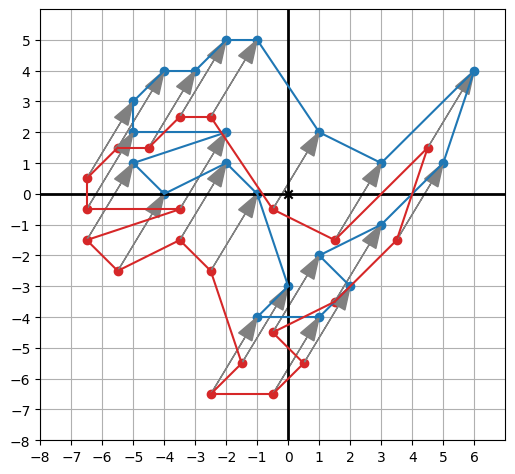

In [24]:
arrows = []
for i in range(len(dino_vectors)):
    arrows.append(Arrow(dino_vectors[i], dino_vectors2[i], color=gray))

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

In [25]:
# 练习2.6
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print(add(u, v))
print(add(u, w))
print(add(v, w))
print(add(u, v, w))


(-0.5, 1.5)
(2, 1)
(5.5, 2.5)
(3.5, 2.5)


(10, 20)


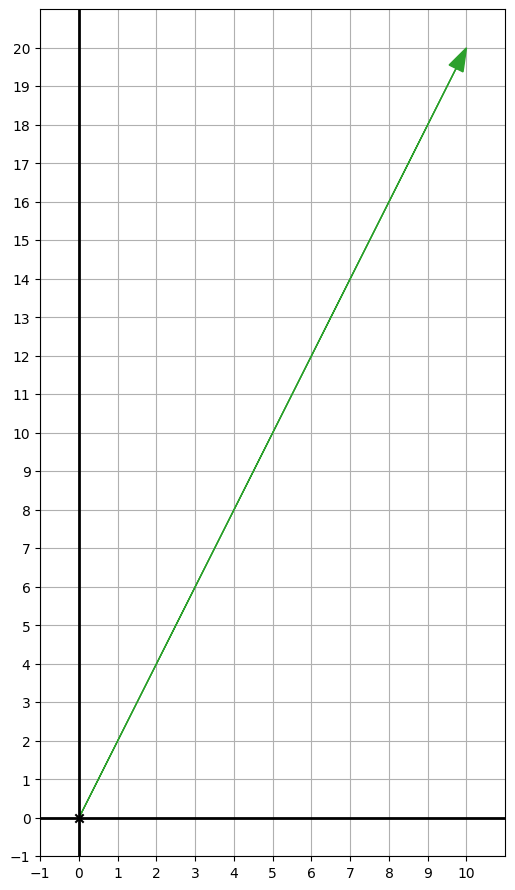

In [26]:
# 练习2.7
a = add((1,2), (2, 4), (3, 6), (4, 8))
print(a)
draw(Arrow(a, color=green))

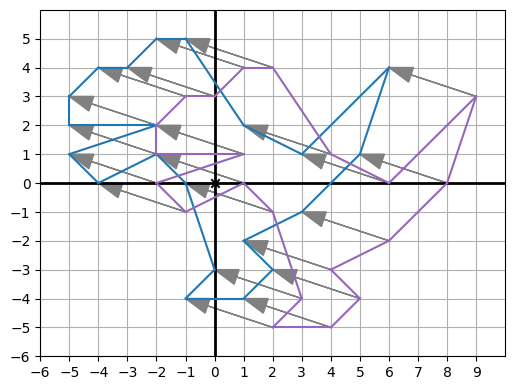

In [30]:
# 练习2.8: 实现函数translate(translation, vectors)，接收一个平移向量和一个向量列表，返回一个根据平移向量平移后的向量列表。
def translate(translation, vectors):
    return [add(v, translation) for v in vectors]
draw(
    Polygon(*dino_vectors, color=blue),
    Polygon(*translate((3, -1), dino_vectors), color=purple),
    *[Arrow(dino_vectors[i], translate((3, -1), dino_vectors)[i], color=gray) for i in range(len(dino_vectors))]
)

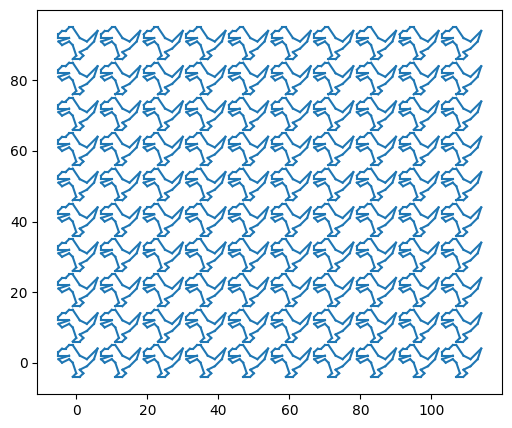

In [33]:
# 练习2.11: 实现一个处理向量加法的Python函数，显示100个相互不重叠的恐龙图像。
polygons = []
for i in range(10):
    for j in range(10):
            polygons.append(Polygon(*translate((i*12, j*10), dino_vectors), color=blue))
draw(*polygons, grid=None, axes=None, origin=None)

In [ ]:
# 练习2.15: dino_vectors列表中哪个向量的长度最长？用我们实现的length函数快速计算出答案
m = max(dino_vectors, key=length)
print(m)
print(length(m))

(6, 4)
7.211102550927978


In [36]:
# 练习2.15扩展: 以绝对值长度排序
def absolute_length(v):
    return abs(v[0]) + abs(v[1])
m2 = max(dino_vectors, key=absolute_length)
print(m2)
print(absolute_length(m2))

(6, 4)
10


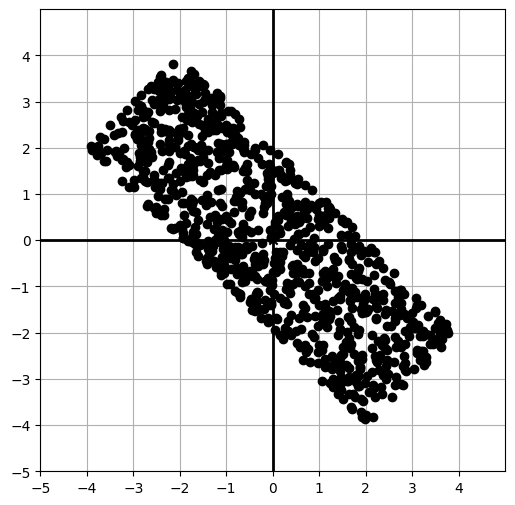

In [39]:
# 练习2.19
from random import uniform
u = (-1,1)
v = (1,1)
def random_r():
    return uniform(-3,3)
def random_s():
    return uniform(-1,1)

possibilities = [add(scale(random_r(), u), scale(random_s(), v))
                 for i in range(0,1000)]
draw(
    Points(*possibilities)
)

In [44]:
# 练习2.25: 实现另一个Python函数perimeter(vectors)，它接收一个向量列表作为参数，并返回每个向量到下一个向量的距离之和（包含末位向量与首位向量之间的距离）​
def perimeter(vectors):
    return sum(distance(vectors[i], vectors[(i+1) % len(vectors)]) for i in range(len(vectors)))

print(perimeter(dino_vectors))
print(perimeter(dino_vectors2))
print(perimeter([(0,1), (1,1), (1,0), (0,0)]))  # 边长为1的正方形，周长为4

44.77115093694563
44.77115093694563
4.0
